In [1]:
# Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

# NLP Packages
import nltk 
from nltk.corpus import stopwords
from textblob import TextBlob 
from textblob import Word
import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
# import eli5



# WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Pandas Settings
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 100)

# Solve warnings
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)

import wrangle

In [2]:
df = wrangle.wrangle_hotel()

Using cached file...


In [3]:
df.head()

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
0,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Metropole,225 Edgware Road Westminster Borough,London,W2 1JU,United Kingdom,51.519569,-0.170521,1485,7.5,6977,United Kingdom,leisure,2.0,group,4,7.5,passive,730,-0.1027,-0.1027,54,39,0.4019,8,6,0.4019,First day the swimming pool was not opened th...,first day swimming pool opened therefore could...,first day swimming pool opened therefore could...,The hotel was clean and accessible,hotel clean accessible,hotel clean accessible
1,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hotel Mademoiselle,7 Rue des Petits H tels 10th,Paris,arr 75010,France,48.877249,2.354304,125,8.6,853,United Kingdom,leisure,2.0,group,10,8.3,passive,730,0.0000,0.0000,0,2,0.7906,7,6,0.7906,No Negative,,,very good location breakfast was great,good location breakfast great,good location breakfast great
2,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Vienna Marriott Hotel,Parkring 12a 01 Innere Stadt,Vienna,1010,Austria,48.205097,16.377093,130,8.2,939,Qatar,unknown,3.0,family with young children,4,10.0,promoter,730,0.0000,0.0000,2,1,0.7579,7,6,0.7579,Nothing,,,It was very nice excellent hotel,nice excellent hotel,nice excellent hotel
3,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Novotel Amsterdam City,Europaboulevard 10 Zuideramstel,Amsterdam,1083 AD,Netherlands,52.333803,4.888471,341,7.8,2501,Austria,leisure,2.0,group,34,9.6,promoter,730,0.0000,0.0000,0,2,0.9414,27,23,0.9414,No Negative,,,Slightly out of the city center but very easy...,slightly city center easy get tram train reall...,slightly city center easy get tram train reall...
4,2015-08-04T00:00:00.000Z,August,8,2015,Tuesday,4,3,Hilton London Kensington Hotel,Holland Park Avenue Kensington and Chelsea,London,W11 4UL,United Kingdom,51.505108,-0.213266,843,7.8,3801,Qatar,leisure,1.0,solo traveler,5,7.5,passive,730,0.0000,0.0000,0,2,0.7964,6,5,0.7964,No Negative,,,Great easy to reAch location,great easy reach location,great easy reach location


In [4]:
df.groupby('hotel_name').mean().sort_values('reviewer_score', ascending=True).head(10)

,month,year,day,quarter,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,nights_stayed,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score
hotel_name,,,,,,,,,,,,,,,,,,,,,
Hotel Liberty,6.723077,2016.200000,14.892308,2.615385,45.450867,9.194866,26.0,5.2,465.0,2.738462,6.076923,5.121538,319.261538,-0.136700,-0.136351,32.107692,25.338462,0.296958,12.230769,10.307692,0.298220
Kube Hotel Ice Bar,6.421053,2016.052632,12.631579,2.368421,48.886570,2.358833,13.0,7.2,197.0,2.526316,8.947368,5.852632,384.315789,-0.241737,-0.220758,38.789474,30.421053,0.364332,15.263158,12.315789,0.364332
Villa Eugenie,8.322581,2016.064516,14.838710,3.096774,48.887128,2.314205,11.0,6.8,165.0,2.483871,5.580645,5.864516,319.935484,-0.066200,-0.063590,23.774194,19.483871,0.162629,9.935484,8.096774,0.162571
Savoy Hotel Amsterdam,6.683128,2016.111111,15.345679,2.559671,52.349743,4.891191,114.0,6.4,995.0,2.399177,5.633745,6.009465,352.403292,-0.037234,-0.033328,37.469136,27.399177,0.344892,12.279835,10.493827,0.344376
Holiday Inn Paris Montparnasse Pasteur,6.027027,2016.297297,14.972973,2.324324,48.837689,2.306310,27.0,7.1,344.0,2.351351,4.621622,6.329730,304.891892,-0.059324,-0.061565,37.972973,26.756757,0.373714,11.837838,9.756757,0.373714
Best Western Maitrise Hotel Edgware Road,6.604545,2016.068182,14.890909,2.559091,51.521148,-0.171346,73.0,6.6,461.0,1.872727,4.095455,6.375000,370.845455,-0.032711,-0.032517,35.295455,26.504545,0.364482,10.013636,8.431818,0.364482
Ibis Styles Milano Palmanova,5.083333,2017.000000,18.333333,2.083333,45.504526,9.246461,12.0,6.7,207.0,2.166667,3.083333,6.383333,73.666667,0.010650,0.011475,33.583333,25.250000,0.511275,20.333333,16.000000,0.511275
Villa Lut ce Port Royal,7.361702,2015.723404,15.063830,2.723404,48.836420,2.360333,20.0,7.0,374.0,2.595745,13.510638,6.385106,473.702128,-0.140647,-0.136374,32.510638,24.808511,0.304472,10.829787,9.170213,0.304472
Hotel Cavendish,6.631522,2016.096739,15.905435,2.540217,51.522052,-0.132414,369.0,6.4,2275.0,2.226087,4.866304,6.442065,358.564130,-0.040823,-0.038753,27.945652,21.513043,0.435366,13.205435,10.609783,0.435733


## What words drive the highest average review score for hotels in London, UK? 

We will begin with univarient exploration moving forward after answering the following questions:
- Which features correlate the highest and lowest with average score? 

In [5]:
# Look at the country with the highest number of reviews
df.country.value_counts()

United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: country, dtype: int64

In [6]:
# Select the area of interest
df_uk = df[df.country == 'United Kingdom']

In [7]:
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 262301 entries, 0 to 515736
Data columns (total 39 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   review_date                                 262301 non-null  object 
 1   month_name                                  262301 non-null  object 
 2   month                                       262301 non-null  int64  
 3   year                                        262301 non-null  int64  
 4   day_name                                    262301 non-null  object 
 5   day                                         262301 non-null  int64  
 6   quarter                                     262301 non-null  int64  
 7   hotel_name                                  262301 non-null  object 
 8   street                                      262301 non-null  object 
 9   city                                        262301 non-null  object 
 

In [8]:
# look at the city with the highest number of reviews
df_uk.city.value_counts()

London    262301
Name: city, dtype: int64

In [9]:
# Select hotels with the highest average score
top_10 = df_uk.groupby('hotel_name').mean().sort_values('average_score', ascending=False).reset_index()

In [10]:
# drop column with no value
top_10 = top_10.drop(columns=['month', 'year', 'day', 'quarter', 'lat', 'lng'])

In [11]:
top_10.describe().T

,count,mean,std,min,25%,50%,75%,max
additional_number_of_scoring,400.0,363.212500,364.356696,11.000000,126.000000,255.000000,462.000000,2682.000000
average_score,400.0,8.464000,0.600796,6.400000,8.100000,8.500000,8.900000,9.600000
total_number_of_reviews,400.0,1533.440000,1510.423444,45.000000,532.250000,1112.000000,2017.500000,12158.000000
nights_stayed,400.0,2.110024,0.515364,1.209184,1.758516,2.018547,2.339909,6.340000
total_number_of_reviews_reviewer_has_given,400.0,6.597636,1.650796,3.661309,5.342467,6.324177,7.596347,12.959596
reviewer_score,400.0,8.454831,0.646081,6.375000,8.049419,8.536108,8.949822,9.711650
days_since_review,400.0,345.407337,69.180728,23.133333,331.190239,357.770393,378.856342,581.201404
neg_sentiment_score,400.0,0.029547,0.031280,-0.122183,0.013061,0.030739,0.048712,0.134904
neg_lem_sentiment_score,400.0,0.030008,0.031303,-0.122183,0.013251,0.031825,0.048984,0.134904
review_total_negative_word_counts,400.0,18.348390,4.851328,5.068966,15.332922,17.924812,21.121356,35.295455


In [12]:
# name of the top hotel
top_10.head()

,hotel_name,additional_number_of_scoring,average_score,total_number_of_reviews,nights_stayed,total_number_of_reviews_reviewer_has_given,reviewer_score,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score
0,Haymarket Hotel,68.0,9.6,255.0,1.859504,8.619835,9.590909,363.280992,0.030362,0.032063,13.528926,11.165289,0.637455,20.066116,16.173554,0.637714
1,41,66.0,9.6,244.0,2.300971,6.009709,9.711650,408.145631,0.039801,0.039544,8.883495,7.708738,0.685048,25.300971,20.145631,0.685737
2,Charlotte Street Hotel,88.0,9.5,319.0,1.843972,7.638298,9.488652,379.283688,0.048114,0.049468,11.503546,9.666667,0.713078,21.815603,17.815603,0.712735
3,Taj 51 Buckingham Gate Suites and Residences,81.0,9.5,310.0,2.398496,6.789474,9.554887,323.864662,0.007396,0.009492,7.398496,6.669173,0.634789,22.240602,17.511278,0.635117
4,Ham Yard Hotel,96.0,9.5,314.0,2.368794,5.553191,9.487943,318.269504,0.020310,0.020491,13.021277,10.453901,0.649543,16.524823,13.510638,0.649543


In [13]:
# create a correlation matrix for average score
corr_matrix = top_10.corr()


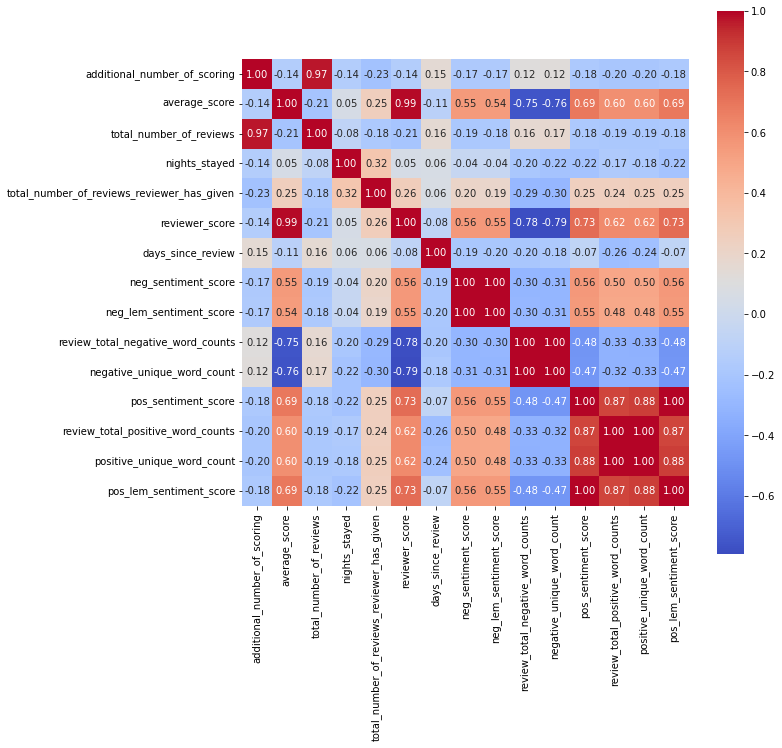

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=1, square=True, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

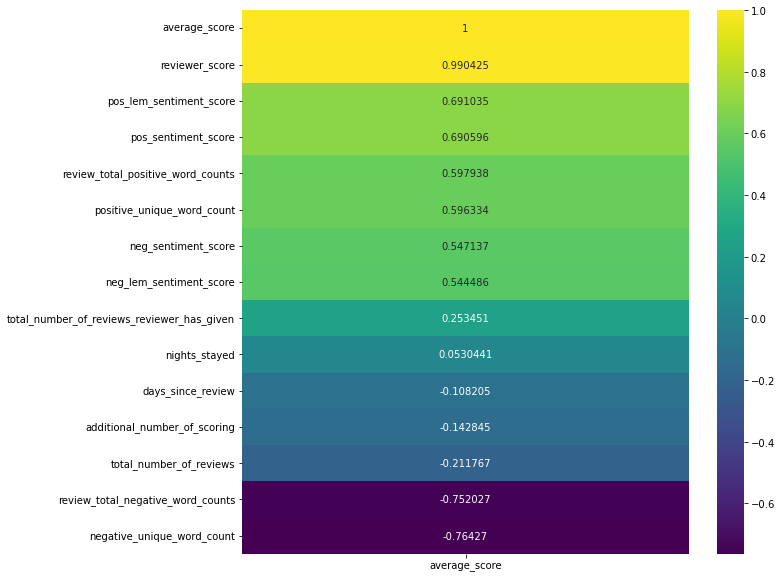

In [15]:

df1 = pd.DataFrame(corr_matrix['average_score'],
              index=corr_matrix.index).sort_values(by='average_score', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(df1, annot=True, fmt="g", cmap='viridis')

plt.show()

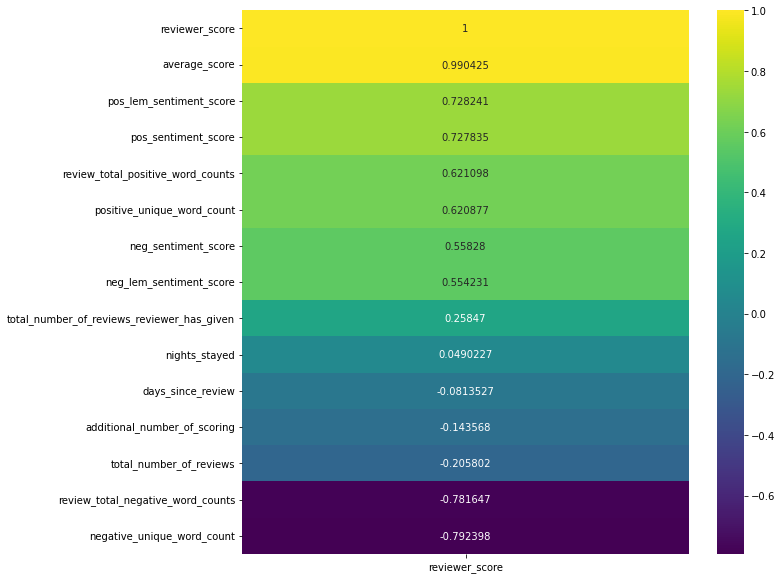

In [16]:
df2 = pd.DataFrame(corr_matrix['reviewer_score'],
              index=corr_matrix.index).sort_values(by='reviewer_score', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(df2, annot=True, fmt="g", cmap='viridis')

plt.show()

<Figure size 720x720 with 0 Axes>

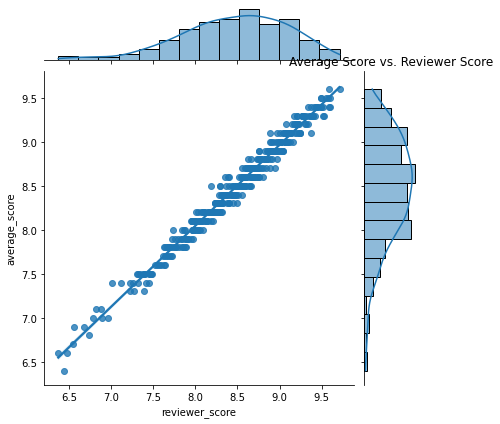

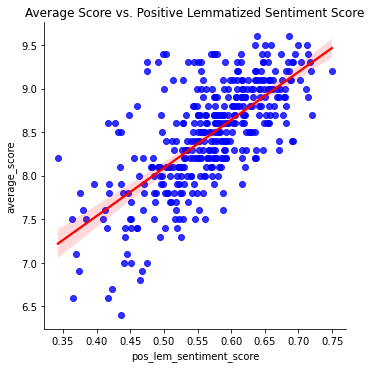

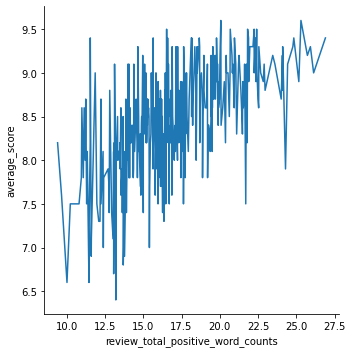

In [17]:
# visualize the average score and correlated features
plt.figure(figsize=(10,10))
sns.jointplot(x='reviewer_score', y='average_score', data=top_10, kind='reg')
plt.title('Average Score vs. Reviewer Score')
sns.lmplot(x='pos_lem_sentiment_score', y='average_score', data=top_10, line_kws={"color": "red"}, scatter_kws={"color": "blue"})
plt.title('Average Score vs. Positive Lemmatized Sentiment Score')
sns.relplot(x='review_total_positive_word_counts', y='average_score', data=top_10, kind='line')

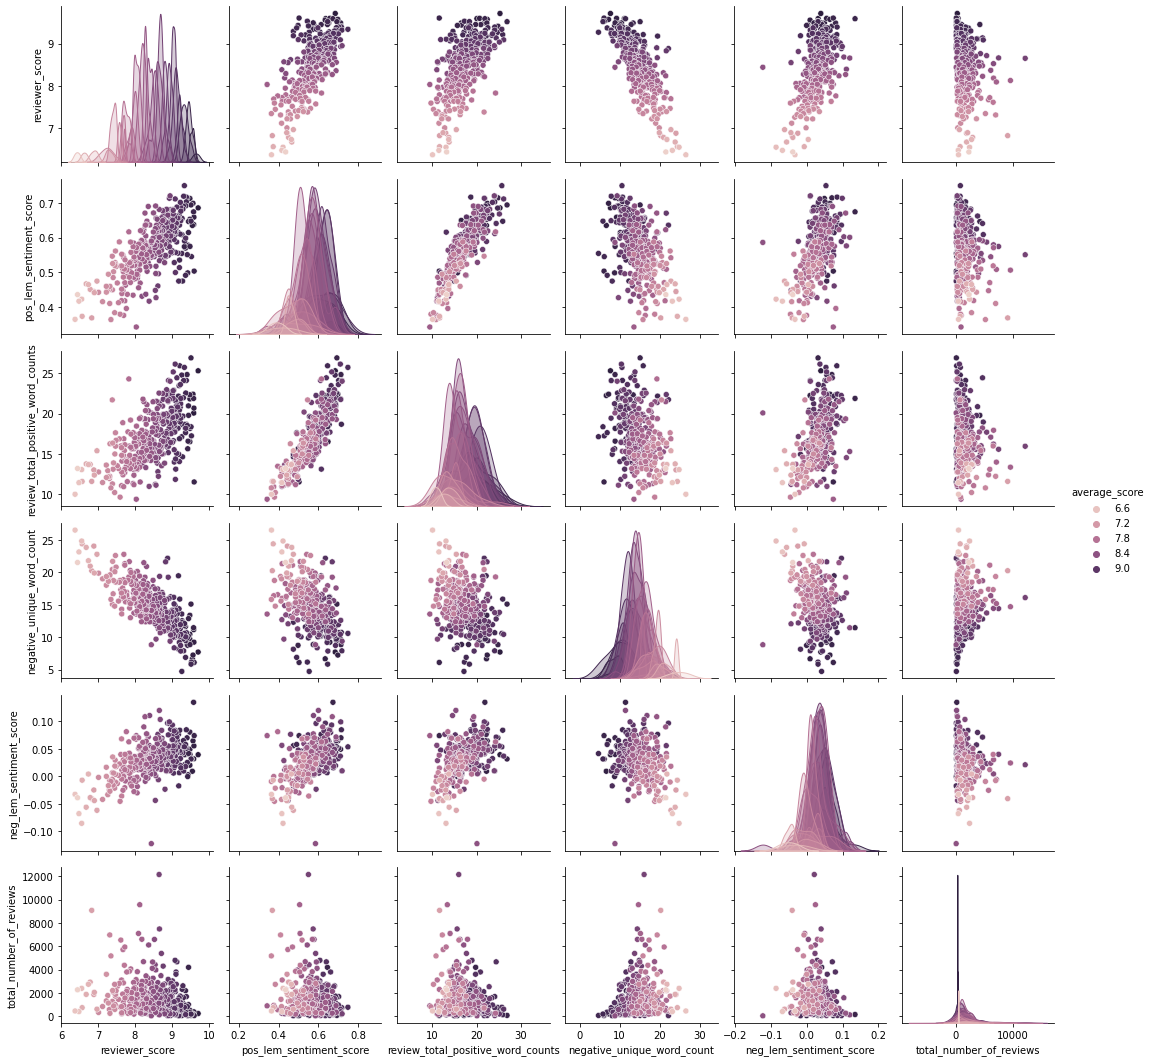

In [18]:
# create a pairplot of the highest correlated features
sns.pairplot(top_10, hue='average_score', vars=['reviewer_score', 'pos_lem_sentiment_score', 'review_total_positive_word_counts', 'negative_unique_word_count', 'neg_lem_sentiment_score', 'total_number_of_reviews'])

TakeAways:
The three highest positive correlated features  to average score are:
 - reviewer_score(.99)
 - pos_lem_sentiment_score(.69)
 - review_total_positive_word_counts(.597)

The three highest negative correlated features to average score are:
 - negative_unique_word_count(-.764)
 - neg_lem_sentiment_score(-.31)
 - total_number_of_reviews(-.21)

The reviewer score is nearly identically correlated to the average score in terms of positive correlations. Looking at the negative correlations the negative unique word counts has the highest negative correlations to the average score. I will continue to explore the data further.

### Intercontinental London The O2 Exploration
This is the highest average review scoreing hotel in London, UK

Answering the following question:
- What words or group of words are most frequently used in positive reviews?


In [19]:
# Create a new dataframe with the Intercontinental London The O2 data
ILO2_o = df_uk[df_uk.hotel_name == 'Intercontinental London The O2']
ILO2 = ILO2_o.copy()

In [20]:
ILO2.head()

,review_date,month_name,month,year,day_name,day,quarter,hotel_name,street,city,zip_code,country,lat,lng,additional_number_of_scoring,average_score,total_number_of_reviews,reviewer_nationality,trip_type,nights_stayed,group_type,total_number_of_reviews_reviewer_has_given,reviewer_score,nps_group,days_since_review,neg_sentiment_score,neg_lem_sentiment_score,review_total_negative_word_counts,negative_unique_word_count,pos_sentiment_score,review_total_positive_word_counts,positive_unique_word_count,pos_lem_sentiment_score,negative_review,negative_clean_review,negative_lemma,positive_review,positive_clean_review,positive_lemma
89507,2015-12-22T00:00:00.000Z,December,12,2015,Tuesday,22,4,Intercontinental London The O2,1 Waterview Drive Greenwich,London,SE10 0TW,United Kingdom,51.502435,-0.00025,1258,9.4,4204,United Kingdom,leisure,1.0,group,5,9.2,promoter,590,0.0000,0.0000,13,10,0.6486,37,28,0.6486,because it was so new the spa was not open yet,new spa open yet,new spa open yet,when we arrived the hotel had only been open ...,arrived hotel open 3hrs brand new staff attent...,arrived hotel open 3hrs brand new staff attent...
89904,2015-12-22T00:00:00.000Z,December,12,2015,Tuesday,22,4,Intercontinental London The O2,1 Waterview Drive Greenwich,London,SE10 0TW,United Kingdom,51.502435,-0.00025,1258,9.4,4204,United Kingdom,leisure,1.0,solo traveler,3,10.0,promoter,590,0.3089,0.3089,11,9,0.0000,8,7,0.0000,Nothing that wasn t addressed immediately Can...,nothing addressed immediately fault,nothing addressed immediately fault,The staff couldn t not do enough,staff enough,staff enough
90126,2015-12-23T00:00:00.000Z,December,12,2015,Wednesday,23,4,Intercontinental London The O2,1 Waterview Drive Greenwich,London,SE10 0TW,United Kingdom,51.502435,-0.00025,1258,9.4,4204,United Kingdom,leisure,1.0,couple,1,10.0,promoter,589,0.5106,0.5106,16,14,0.8807,17,16,0.8807,The walkway to the o2wasnt finished so had to...,walkway o2wasnt finished walk luckily raining,walkway o2wasnt finished walk luckily raining,Immaculate hotel although not finished staff ...,immaculate hotel although finished staff helpf...,immaculate hotel although finished staff helpf...
90841,2015-12-24T00:00:00.000Z,December,12,2015,Thursday,24,4,Intercontinental London The O2,1 Waterview Drive Greenwich,London,SE10 0TW,United Kingdom,51.502435,-0.00025,1258,9.4,4204,United Kingdom,leisure,1.0,couple,1,10.0,promoter,588,0.0000,0.0000,0,2,0.8720,9,8,0.8720,No Negative,,,Friendly staff warm welcome Spacious rooms Ni...,friendly staff warm welcome spacious rooms nic...,friendly staff warm welcome spacious room nice...
91014,2015-12-24T00:00:00.000Z,December,12,2015,Thursday,24,4,Intercontinental London The O2,1 Waterview Drive Greenwich,London,SE10 0TW,United Kingdom,51.502435,-0.00025,1258,9.4,4204,United Kingdom,leisure,1.0,couple,2,10.0,promoter,588,0.0000,0.0000,0,2,0.8481,48,39,0.8481,No Negative,,,Location perfect for the o2 Unfortunately we ...,location perfect o2 unfortunately 10th guest a...,location perfect o2 unfortunately 10th guest a...


In [21]:
ILO2.reset_index(inplace=True)

In [22]:
# create a new dataframe with the columns 'nps_group', 'positive_lemma'
ILO2_nps = ILO2[['nps_group', 'positive_lemma', 'negative_lemma']]


In [23]:
# look at data
ILO2_nps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2551 entries, 0 to 2550
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   nps_group       2551 non-null   object
 1   positive_lemma  2551 non-null   object
 2   negative_lemma  2551 non-null   object
dtypes: object(3)
memory usage: 59.9+ KB


In [24]:
nps = pd.concat([ILO2_nps.nps_group.value_counts(),
                    ILO2_nps.nps_group.value_counts(normalize=True)], axis=1)
nps.columns = ['n', 'percent']
nps

,n,percent
promoter,2158,0.845943
passive,324,0.127009
detractor,69,0.027048


In [25]:

def clean(text):
    'A simple function to cleanup text data'
    words = re.sub(r'[^\w\s]', '', text).split()
    return words


In [26]:
ILO2_nps.isnull().sum()
# drop rows with missing values
ILO2_nps = ILO2_nps.dropna()

In [27]:
# create a new dataframe with the columns 'nps_group', 'positive_lemma'
pos_promo_words = clean(' '.join(ILO2_nps[ILO2_nps.nps_group == 'promoter'].positive_lemma))
pos_pass_words = clean(' '.join(ILO2_nps[ILO2_nps.nps_group == 'passive'].positive_lemma))
pos_detract_words = clean(' '.join(ILO2_nps[ILO2_nps.nps_group == 'detractor'].positive_lemma))
pos_all_words = clean(' '.join(ILO2_nps.positive_lemma))

# create a new dataframe with the columns 'nps_group', 'negative_lemma'
neg_promo_words = clean(' '.join(ILO2_nps[ILO2_nps.nps_group == 'promoter'].negative_lemma))
neg_pass_words = clean(' '.join(ILO2_nps[ILO2_nps.nps_group == 'passive'].negative_lemma))
neg_detract_words = clean(' '.join(ILO2_nps[ILO2_nps.nps_group == 'detractor'].negative_lemma))
neg_all_words = clean(' '.join(ILO2_nps.negative_lemma))



In [28]:
# create a new dataframe with the columns 'nps_group', 'positive_lemma'
pos_promo_freq = pd.Series(pos_promo_words).value_counts()
pos_pass_freq = pd.Series(pos_pass_words).value_counts()
pos_detract_freq = pd.Series(pos_detract_words).value_counts()
pos_all_freq = pd.Series(pos_all_words).value_counts()
# create a new dataframe with the columns 'nps_group', 'negative_lemma'
neg_promo_freq = pd.Series(neg_promo_words).value_counts()
neg_pass_freq = pd.Series(neg_pass_words).value_counts()
neg_detract_freq = pd.Series(neg_detract_words).value_counts()
neg_all_freq = pd.Series(neg_all_words).value_counts()

In [29]:
pos_pass_freq.head()

room     102
staff     92
bed       77
o2        69
hotel     66
dtype: int64

In [30]:
neg_pass_freq.head()

room         148
bar           83
hotel         79
breakfast     68
staff         60
dtype: int64

In [31]:

pos_word_counts = (pd.concat([pos_all_freq, pos_promo_freq, pos_pass_freq, pos_detract_freq], axis=1, sort=True)
                .set_axis(['all', 'promo', 'pass', 'detract'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

neg_word_counts = (pd.concat([neg_all_freq, neg_promo_freq, neg_pass_freq, neg_detract_freq], axis=1, sort=True)
                .set_axis(['all', 'promo', 'pass', 'detract'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

In [32]:
pos_word_counts.sort_values(by='all', ascending=False).head(10)

,all,promo,pass,detract
staff,1127,1028,92,7
room,899,782,102,15
hotel,803,732,66,5
o2,614,535,69,10
bed,593,500,77,16
view,539,469,63,7
great,525,463,56,6
location,460,385,62,13
excellent,457,417,37,3
friendly,444,398,43,3


In [33]:
neg_word_counts.sort_values(by='all', ascending=False).head(10)

,all,promo,pass,detract
room,496,294,148,54
hotel,325,212,79,34
bar,320,224,83,13
breakfast,280,189,68,23
staff,190,107,60,23
price,179,142,30,7
would,176,116,45,15
service,169,120,37,12
expensive,163,123,30,10
could,162,129,28,5


Positive word clouds

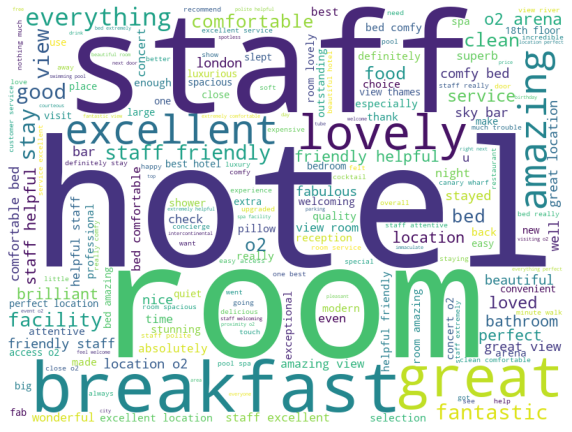

In [34]:
# create a word cloud for the top 10 words in promoter group
pos_promo_wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(pos_promo_words))
plt.figure(figsize=(10,10))
plt.imshow(pos_promo_wordcloud)
plt.axis('off')
plt.show()
                

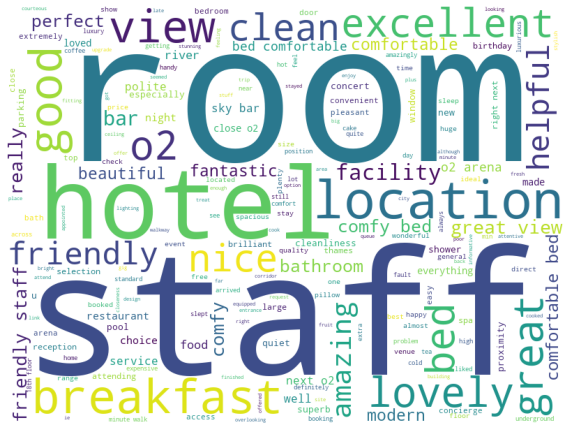

In [35]:
# create a word cloud for the top 10 words in passive group
pos_pass_wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(pos_pass_words))
plt.figure(figsize=(10,10))
plt.imshow(pos_pass_wordcloud)
plt.axis('off')
plt.show()

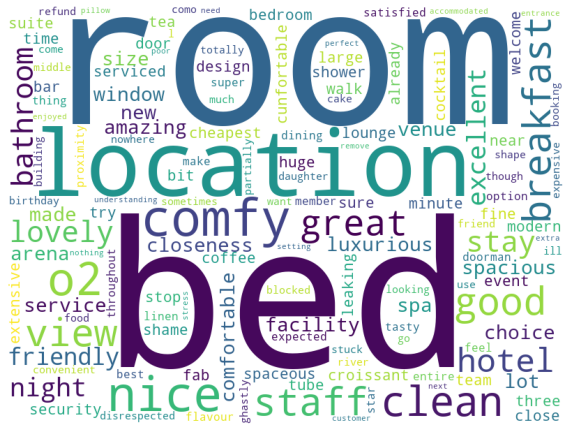

In [36]:
# create a word cloud for the top 10 words in detractor group
pos_det_wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(pos_detract_words))
plt.figure(figsize=(10,10))
plt.imshow(pos_det_wordcloud)
plt.axis('off')
plt.show()

Negative word clouds

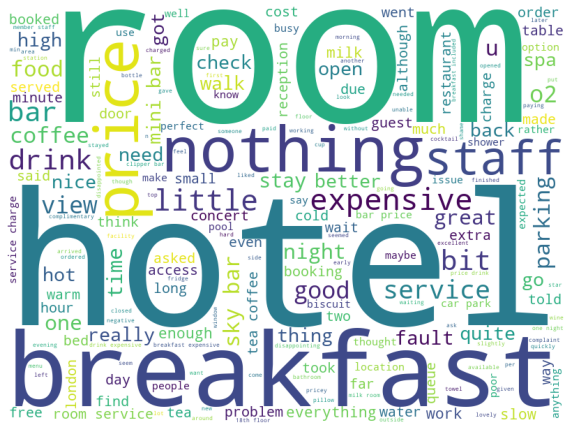

In [37]:
neg_promo_wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(neg_promo_words))
plt.figure(figsize=(10,10))
plt.imshow(neg_promo_wordcloud)
plt.axis('off')
plt.show()

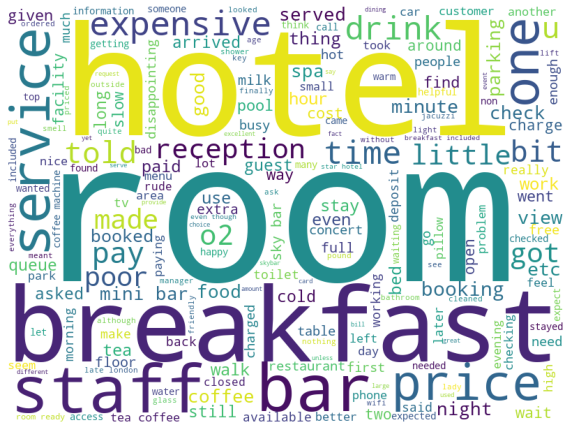

In [38]:
neg_pass_wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(neg_pass_words))
plt.figure(figsize=(10,10))
plt.imshow(neg_pass_wordcloud)
plt.axis('off')
plt.show()

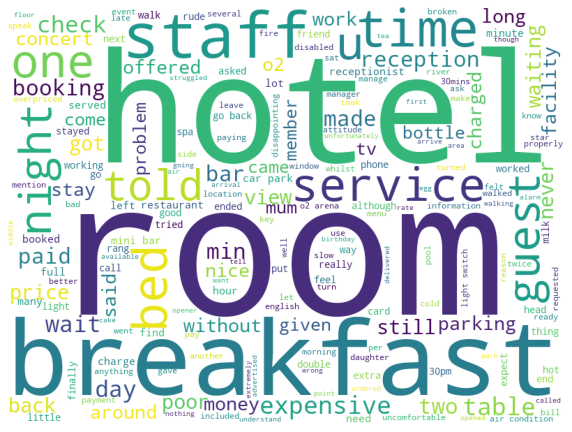

In [39]:
neg_det_wordcloud = WordCloud(background_color='white', width=800, height=600).generate(' '.join(neg_detract_words))
plt.figure(figsize=(10,10))
plt.imshow(neg_det_wordcloud)
plt.axis('off')
plt.show()

#### Take aways:

The average score of the hotel is directly driven by the reviewer score. Looking into each positive review we categorize each review into three groups:
 - promoter 
 - passive
 - detractor

##### Positive reviews
 
From the positive reviews the promoter's four most frequent words are room, hotel, staff, and breakfast.

The passive reviews have the most frequent words are hotel, room, staff, location.

The detractor reviews have the most frequent words are bed, room, location, and comfy.

##### Negative reviews

From the negative reviews the promoter most frequent words are bed, room, breafkast, and price.

The passive reviews have the most frequent words are hotel, room, breakfast, and staff.

The detractor reviews have the most frequent words are hotel, room, staff, and time.


#### Actionable recommendations:
- The staff and the upkeep of the hotel are the primary factors that drive reviewer positive and negative reviews. Our reccomendation for the Intercontinental London The O2 is to ensure the staff remains friendly and diligent to maintain postive reviews and avoid exstensive negative reviews.



In [40]:
# create a function that gathers all the data for a given hotel
def hotel_data():
    # combine the 'month', 'year', and 'day' columns into a single column called 'date'
    df['date'] = df['month'].astype(str) + '/' + df['day'].astype(str) + '/' + df['year'].astype(str)
    # create datetime with date column
    df['date'] = pd.to_datetime(df['date'])
    # set date as datetime index
    df.set_index('date', inplace=True)
    hotel_name = input('Enter a hotel name: ')
    hotel_df = df[df.hotel_name == hotel_name]
    hotel_df = df.resample('W').mean().assign(
    rolling_30=lambda df: df.reviewer_score.rolling(4).mean(),
    rolling_60=lambda df: df.reviewer_score.rolling(8).mean(),
    rolling_90=lambda df: df.reviewer_score.rolling(12).mean(),
    )
    # create one plot for all three rolling averages
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    ax.plot(hotel_df.rolling_30, label='30-day rolling average')
    ax.plot(hotel_df.rolling_60, label='60-day rolling average')
    ax.plot(hotel_df.rolling_90, label='90-day rolling average')
    ax.set_title('Rolling averages of reviewer score for the \n' + hotel_name)
    ax.set_ylabel('reviewer score')
    ax.lines[0].set_linewidth(4)
    ax.lines[1].set_linewidth(4)
    ax.lines[2].set_linewidth(4)
    for label in ax.xaxis.get_ticklabels():
        label.set_fontsize(15)
    ax.tick_params(axis='x', rotation=30)
    ax.legend()

    # create a plot for the rolling aver of number of reviews
    hotel_df = df[df.hotel_name == hotel_name]
    feature = input('Enter a feature: ')
    hotel_df = df.resample('W').mean().assign(
    rolling_30=lambda df: df[feature].rolling(4).mean(),
    rolling_60=lambda df: df[feature].rolling(8).mean(),
    rolling_90=lambda df: df[feature].rolling(12).mean(),
    )
    fig, ax = plt.subplots(1,1, figsize=(10,6))
    ax.plot(hotel_df.rolling_30, label='30-day rolling average')
    ax.plot(hotel_df.rolling_60, label='60-day rolling average')
    ax.plot(hotel_df.rolling_90, label='90-day rolling average')
    ax.set_title('Rolling averages of number of reviews for the \n' + hotel_name)
    ax.set_ylabel('number of reviews')
    ax.lines[0].set_linewidth(4)
    ax.lines[1].set_linewidth(4)
    ax.lines[2].set_linewidth(4)
    for label in ax.xaxis.get_ticklabels():
        label.set_fontsize(15)
    ax.tick_params(axis='x', rotation=30)
    ax.legend()
    plt.show()
    return

In [41]:
df.columns

Index(['review_date', 'month_name', 'month', 'year', 'day_name', 'day',
       'quarter', 'hotel_name', 'street', 'city', 'zip_code', 'country', 'lat',
       'lng', 'additional_number_of_scoring', 'average_score',
       'total_number_of_reviews', 'reviewer_nationality', 'trip_type',
       'nights_stayed', 'group_type',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score',
       'nps_group', 'days_since_review', 'neg_sentiment_score',
       'neg_lem_sentiment_score', 'review_total_negative_word_counts',
       'negative_unique_word_count', 'pos_sentiment_score',
       'review_total_positive_word_counts', 'positive_unique_word_count',
       'pos_lem_sentiment_score', 'negative_review', 'negative_clean_review',
       'negative_lemma', 'positive_review', 'positive_clean_review',
       'positive_lemma'],
      dtype='object')

KeyError: ''

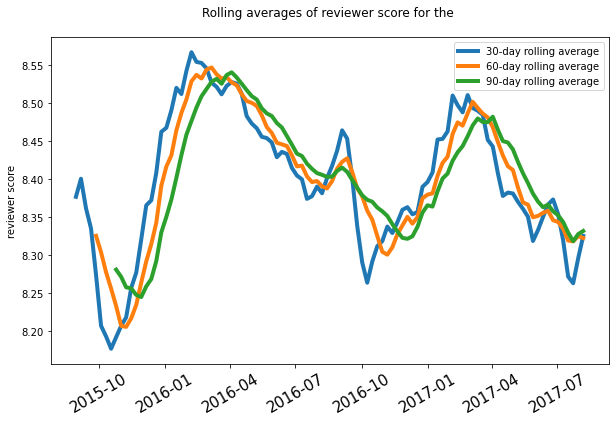

In [42]:
hotel_data()

What drives the revierwer score for hotels that have an average score greater than 8.5?

In [ ]:
# select all hotels that have an average score higher than 9
top_hotels = df[df.average_score > 8.5].hotel_name.unique()

In [ ]:
# select all rows with top_hotels
top_hotels_df = df[df.hotel_name.isin(top_hotels)]

In [ ]:
# split top_hotels_df into train and test sets
# import train_test_split from sklearn
from sklearn.model_selection import train_test_split

train, test = train_test_split(top_hotels_df, test_size=0.2)

In [ ]:
# Create a correlation matrix of top_hotels_df
corr = train.corr()

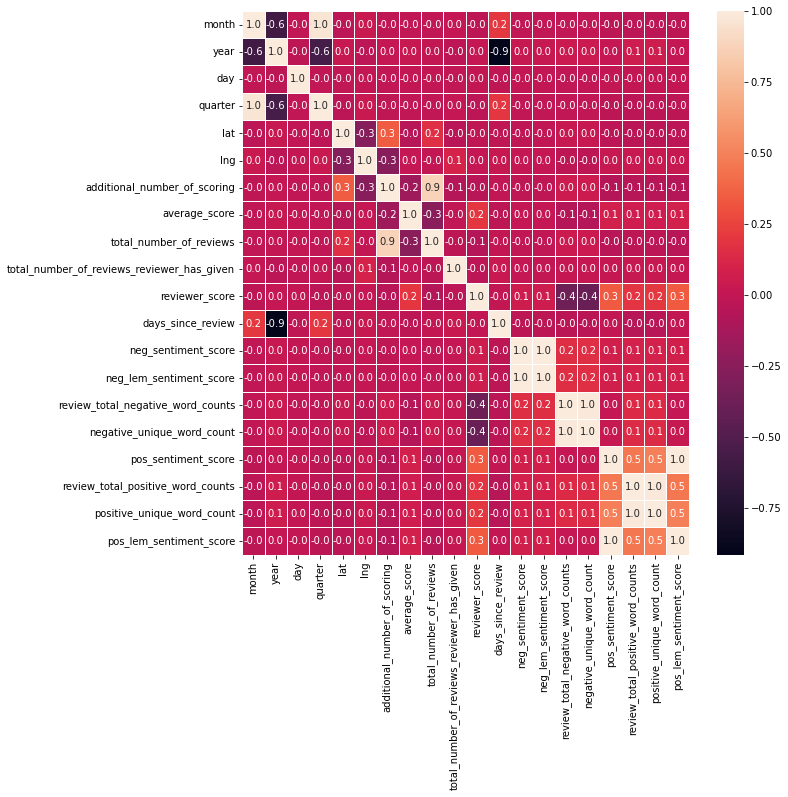

In [ ]:
# visualize the correlation matrix
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, annot=True, linewidths=.5, fmt='.1f', ax=ax)
plt.show()

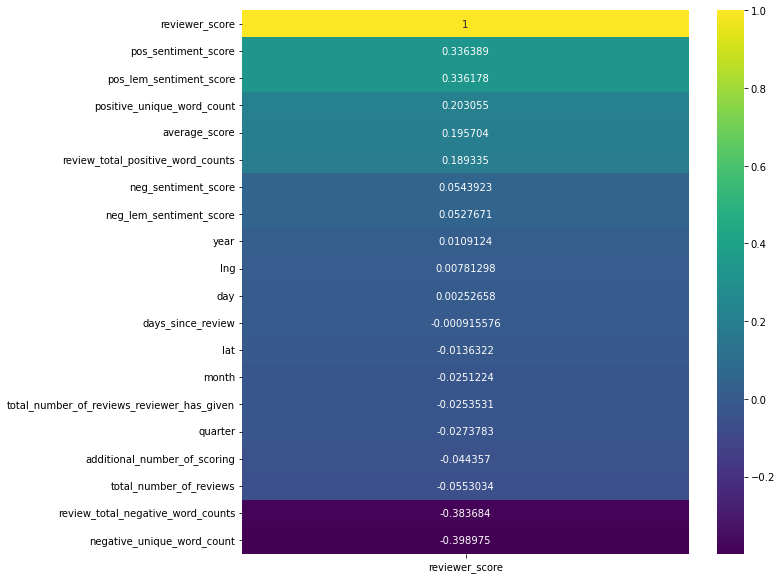

In [ ]:
df1 = pd.DataFrame(corr['reviewer_score'],
              index=corr.index).sort_values(by='reviewer_score', ascending=False)

plt.figure(figsize=(10,10))
sns.heatmap(df1, annot=True, fmt="g", cmap='viridis')

plt.show()

For hotels with a average score greater than 8.5 the highest correlated feature to the reviewer score is pos_sentiment_score with a correlation of .336 while the highest negative correlated feature is the negative_unique_word_count with a correlation of -.398.

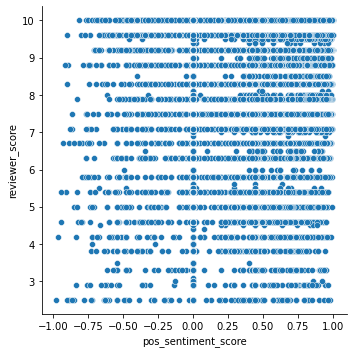

In [ ]:
# create a relplot of the reviewer_score and the pos_sentiment_score
sns.relplot(y='reviewer_score', x='pos_sentiment_score', data=train, kind='scatter')


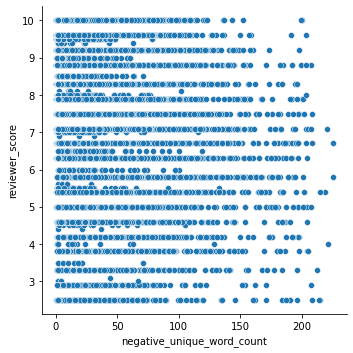

In [ ]:
sns.relplot(y='reviewer_score', x='negative_unique_word_count', data=train, kind='scatter')


There is no linear correlation between the reviewer score, negative unique word count, and pos_sentiment_score.

<AxesSubplot:>

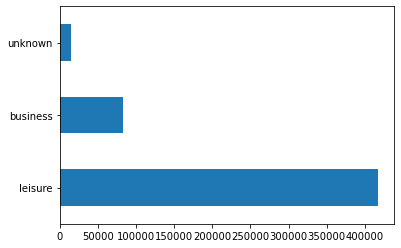

In [43]:
df.trip_type.value_counts().plot.barh()

In [44]:
# what percentage of trop type is leisure?
df.trip_type.value_counts()[0]/df.trip_type.value_counts().sum()

0.8100585956435244

Question: what topic is most associated with the customer reviews who are on a leisure trip?

Looking at the chart above 81% of the the customers who gave a review was on a leisure trip. Leaving ~20% of the customers who gave a review to be on a buisness trip or other. Understanding the purpose of the customers stay can help shape the hotel to cater to the needs of the customer. 